## Rainfall Prediction In Australia

* By Arjun Angirishi

### Introduction

#### Aim
Predict next-day rain by training classification models on the target variable RainTomorrow.

#### Dataset
This dataset contains about 10 years of daily weather observations from many locations across Australia.RainTomorrow is the target variable to predict which indicates whether it rain the next day or not. Observations were drawn from numerous weather stations. <br>
* The daily observations are available from http://www.bom.gov.au/climate/data.
* An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml
* Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
* Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data

## Importing the necessary libraries

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,roc_auc_score,cohen_kappa_score,f1_score,confusion_matrix,classification_report,plot_roc_curve

In [2]:
import time
import pickle
from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [5]:
df=pd.read_csv('weatherAUS.csv') #Reading the csv file

In [6]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [7]:
df.sample(10) #Observing 10 Random Samples using dataframe.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
132066,2014-11-04,Hobart,8.3,22.9,0.0,3.4,7.1,N,50.0,NNW,...,47.0,33.0,1017.7,1013.6,6.0,7.0,14.3,22.0,No,Yes
123884,2009-02-23,SalmonGums,11.9,30.1,0.0,NaN,NaN,NE,41.0,E,...,59.0,34.0,NaN,NaN,NaN,NaN,17.1,27.4,No,No
142458,2013-08-02,Katherine,11.0,32.3,0.0,6.0,NaN,SSE,37.0,SE,...,49.0,NaN,1016.5,1012.6,0.0,0.0,20.5,31.5,No,No
92502,2015-05-10,GoldCoast,12.4,24.3,0.0,NaN,NaN,WNW,31.0,WNW,...,55.0,34.0,1016.7,1012.6,NaN,NaN,18.3,23.7,No,No
79012,2011-11-20,Watsonia,12.4,22.8,11.6,2.4,11.9,SW,54.0,WSW,...,77.0,40.0,1013.4,1013.1,6.0,6.0,15.0,21.5,Yes,No
134065,2011-10-31,Launceston,5.6,18.5,0.0,NaN,NaN,NW,26.0,SSE,...,54.0,56.0,1022.5,1019.8,NaN,NaN,12.4,16.0,No,No
1093,2011-12-29,Albury,13.8,29.7,0.0,NaN,NaN,SSE,22.0,SSE,...,49.0,28.0,1014.5,1012.5,NaN,NaN,20.8,27.9,No,No
108766,2009-06-14,Albany,9.0,16.8,5.4,2.2,1.7,NaN,NaN,NW,...,79.0,81.0,1025.6,1023.7,8.0,6.0,12.0,16.6,Yes,No
85597,2013-01-07,Brisbane,19.8,30.5,0.2,8.8,8.9,ESE,35.0,E,...,54.0,49.0,1019.3,1016.9,7.0,7.0,26.7,28.5,No,No
86739,2016-03-22,Brisbane,19.0,28.8,0.0,6.4,10.5,E,28.0,S,...,57.0,52.0,1013.4,1011.0,1.0,2.0,24.6,26.9,No,No


In [8]:
df.shape

(145460, 23)

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
df.info()
#Clearly we have both numerical and categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Exploratory Data Analysis

In [11]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [12]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [13]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


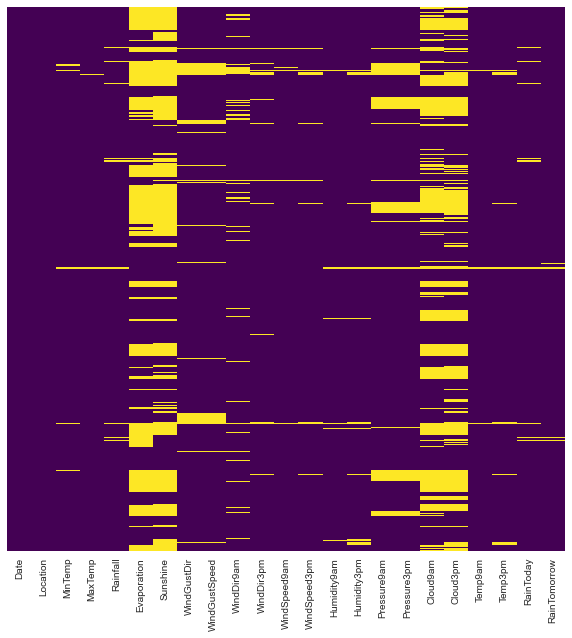

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.isnull(),cmap='viridis', ax=ax , yticklabels=False, cbar= False)
plt.show()


Almost every variable has presence of NaN values, which have to be removed before furthur processing

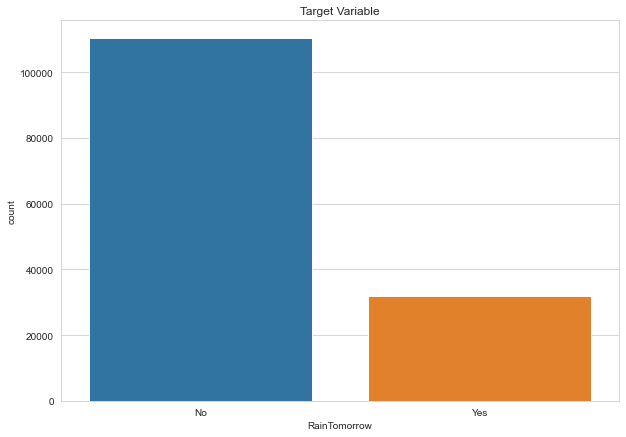

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(df['RainTomorrow'])
plt.title('Target Variable')
plt.show()

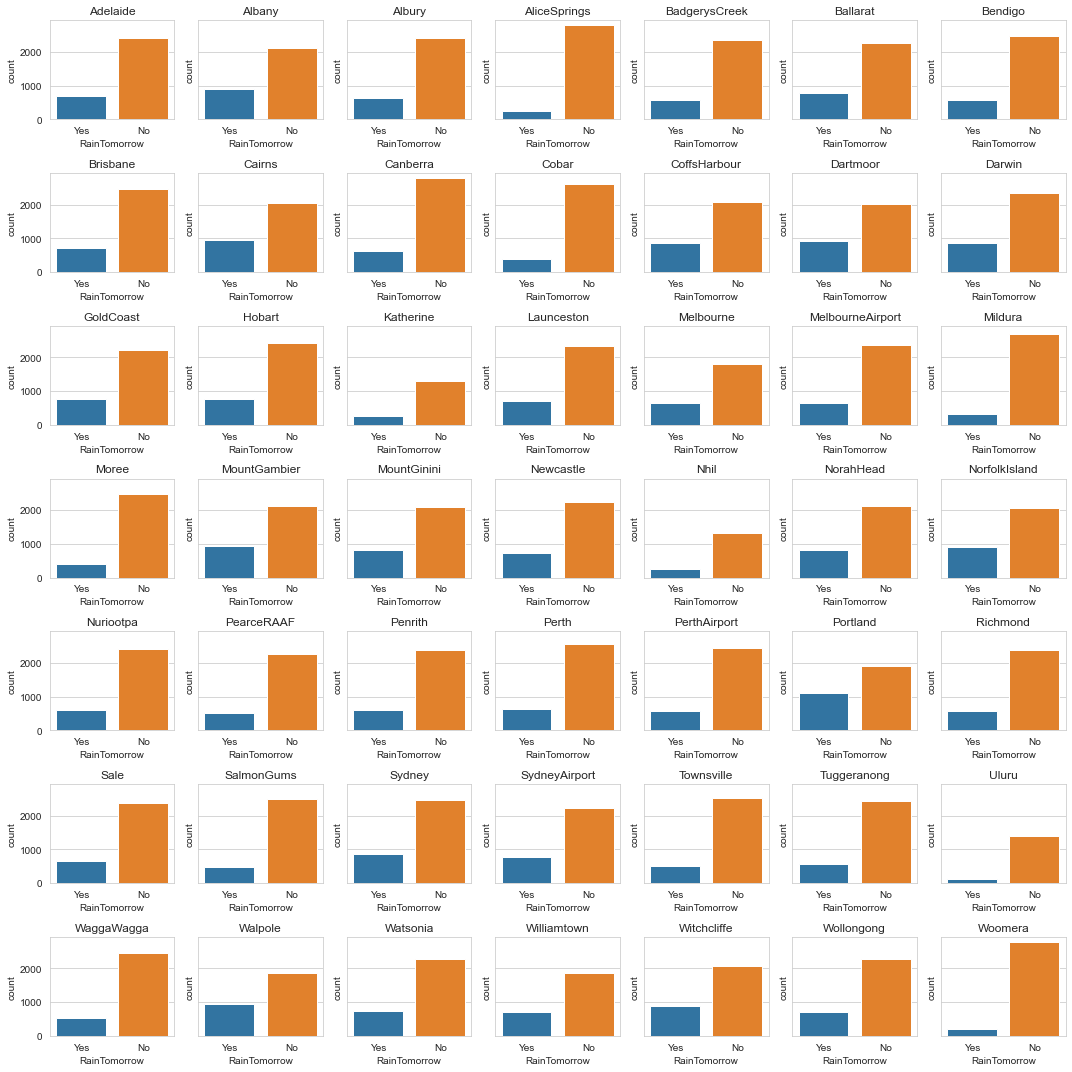

In [16]:
locations = sorted(df['Location'].unique())

fig,ax = plt.subplots(7,7, figsize=(15,15),sharey=True,tight_layout=True)
ax_flat = ax.flatten()
for i,location in enumerate(locations):
    sns.countplot(data = df[df.Location == location], x = 'RainTomorrow', order = ['Yes','No'], ax=ax_flat[i])
    ax_flat[i].set_title(location)

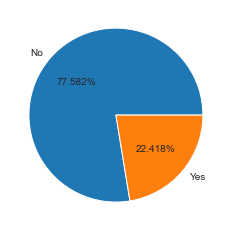

In [17]:
df.dropna(subset=['RainTomorrow'], inplace=True)
d = df['RainTomorrow'].value_counts()
labels = list(d.index)
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

The dataset is clearly imbalanced with 77% 'NO' values and only 23% 'YES ' Values

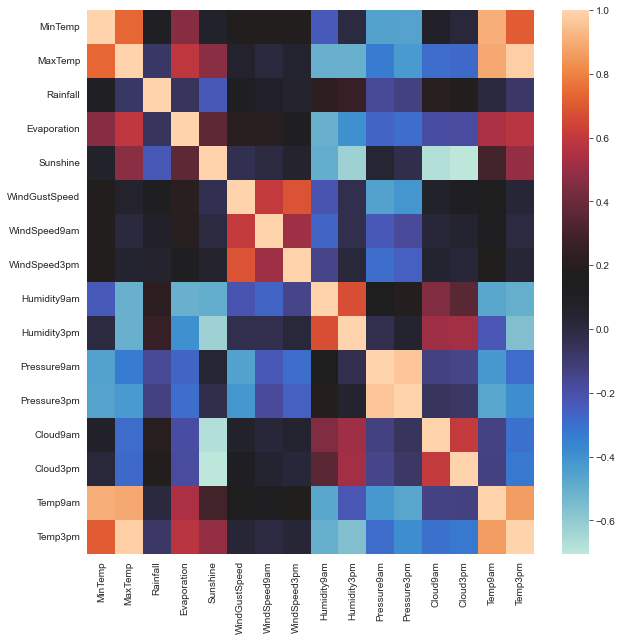

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(),cmap='icefire',ax=ax)
plt.show()

Clearly the Rainfall is negatively or weakly correlated with almost every feature 

### Classifying the features based on numerical and categorical

In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if feature not in numerical_features]

#### Furthur Classifying The Numerical Features and Categorical Features According To The Number Of Unique Values

In [20]:
# Classifying The Numerical Features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

# Classifying Categorical Features As Binary or What
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]

### Visualizing the Continuous Features

In [21]:
def generate_distribution_plot(df, continuous_features):
    data = df[continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)
    
    font = {'family': 'sans-serif',
        'color':  'green',
        'weight': 'normal',
        'size': 18,
        }
    
    # Generating distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

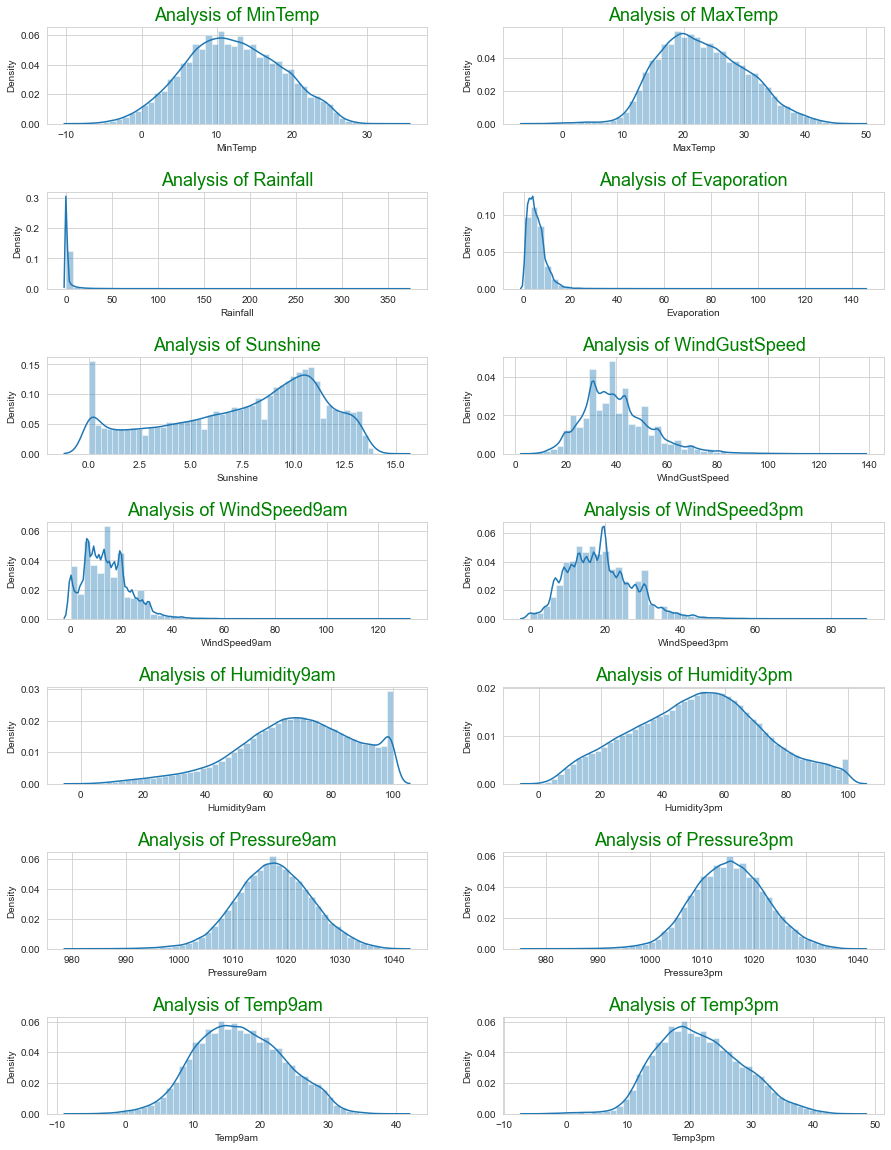

In [22]:
generate_distribution_plot(df, continuous_features)

##### For features with more than 50000 missing values, we impute missing values using Random Sampling

In [23]:
sample_imputation_features = [col for col in df.columns if (df.isnull().sum()[col] > 50000)]

In [24]:
# Random Sampling for high number of missing values features-
def randomsampleimputation(df, columns):
    data = df.copy()
    for column in columns:
        random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=2022)
        random_sample.index = data[data[column].isnull()].index
        data.loc[data[column].isnull(),column] = random_sample
    return data

In [25]:
df = randomsampleimputation(df,sample_imputation_features)

##### Imputing Means for missing values in other numerical features

In [26]:
missing_values_numeric_features  = [col for col in df.columns if (df.isnull().sum()[col] > 0) & (df[col].dtypes != 'object')]

In [27]:
def impute_means(df, missing_values_columns):
    data = df.copy()
    '''Filling missing values with mean'''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())
        
    return data

In [28]:
# lets use this function to fill the missing values
df = impute_means(df,missing_values_numeric_features)

#### Checking Missing Values in features now

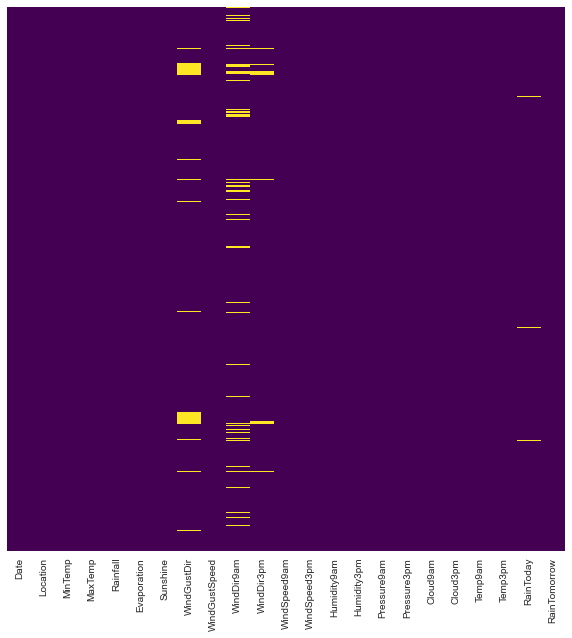

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.isnull(),cmap='viridis', ax=ax , yticklabels=False, cbar= False)
plt.show()

We will be imputing the missing values in categorical features later             

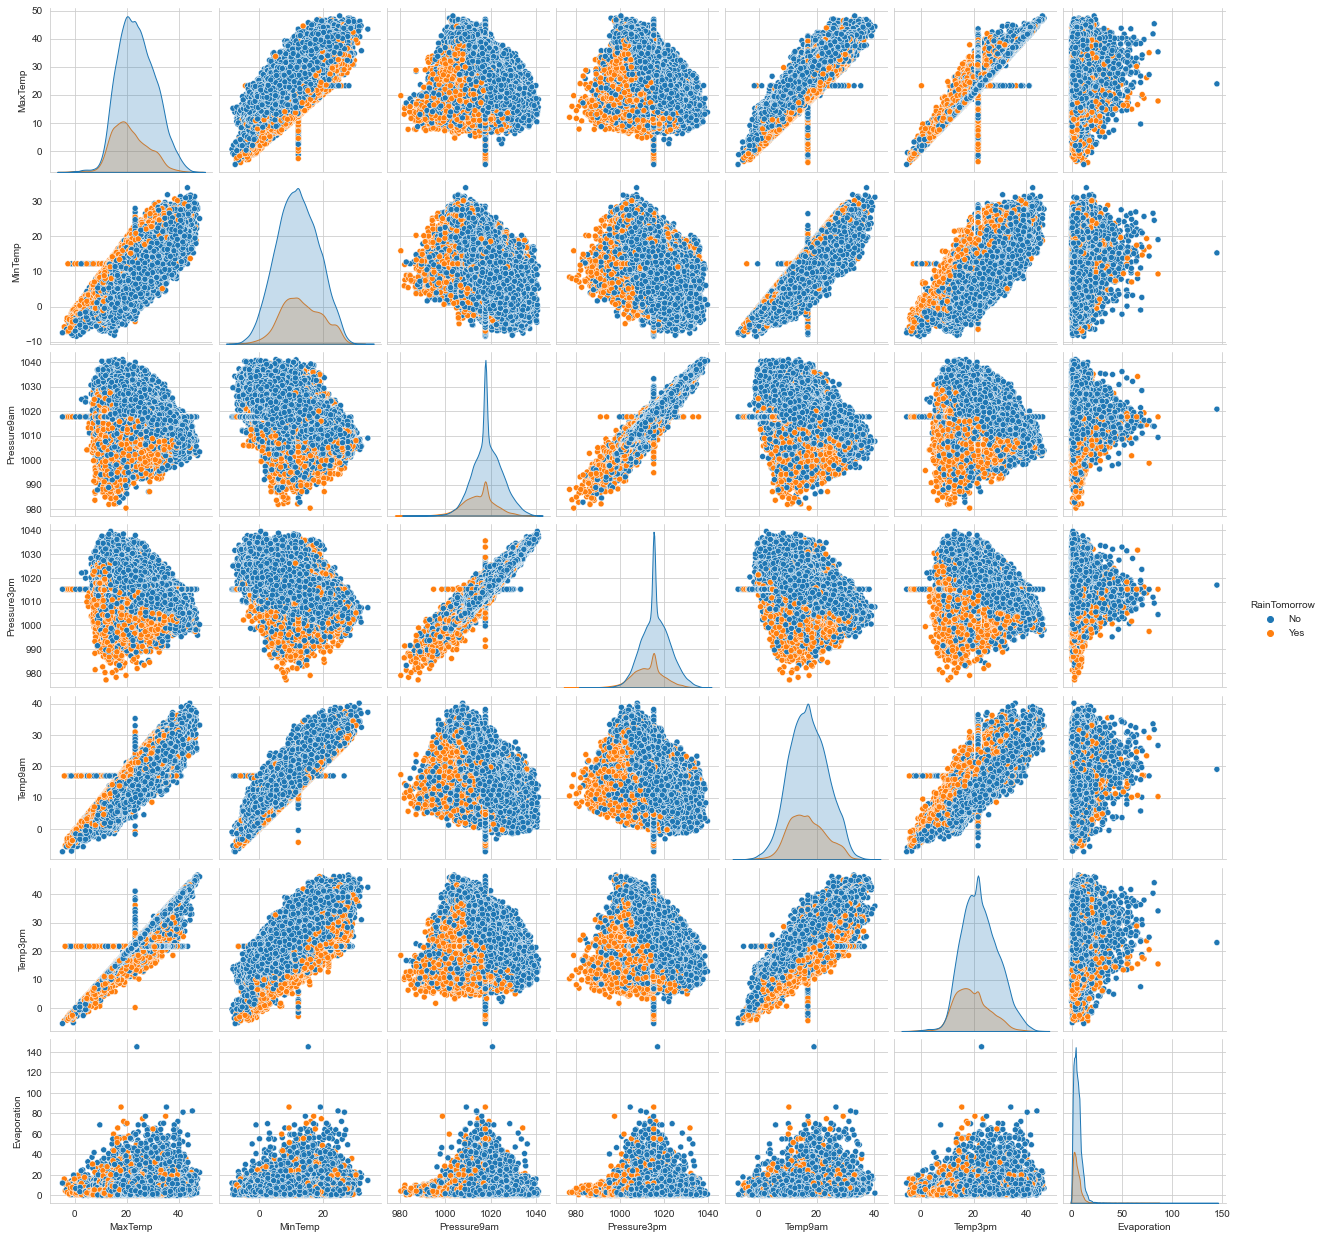

In [30]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

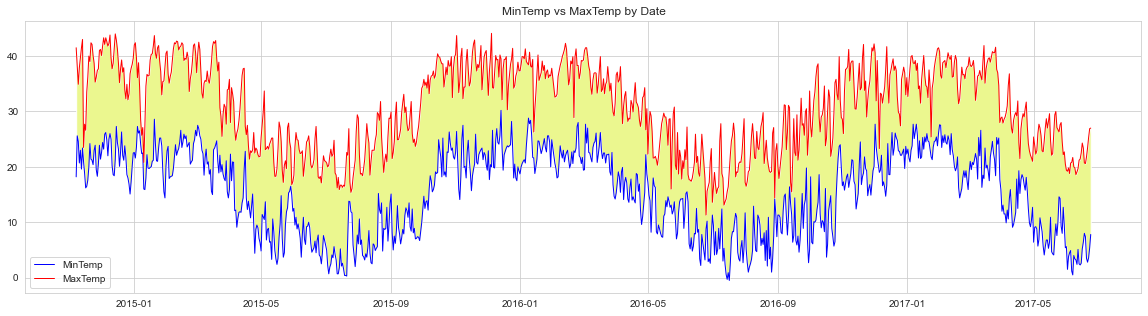

In [31]:
df["Date"] = pd.to_datetime(df["Date"])
# using data from last 3 years.
df_last_3_years = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_last_3_years['Date'],df_last_3_years['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_last_3_years['Date'],df_last_3_years['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_last_3_years['Date'],df_last_3_years['MinTemp'],df_last_3_years['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left')
plt.show()

### Changing the form of the Date feature

In [32]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

# We don't need date feature anymore for model building
df.drop('Date', axis=1, inplace=True)

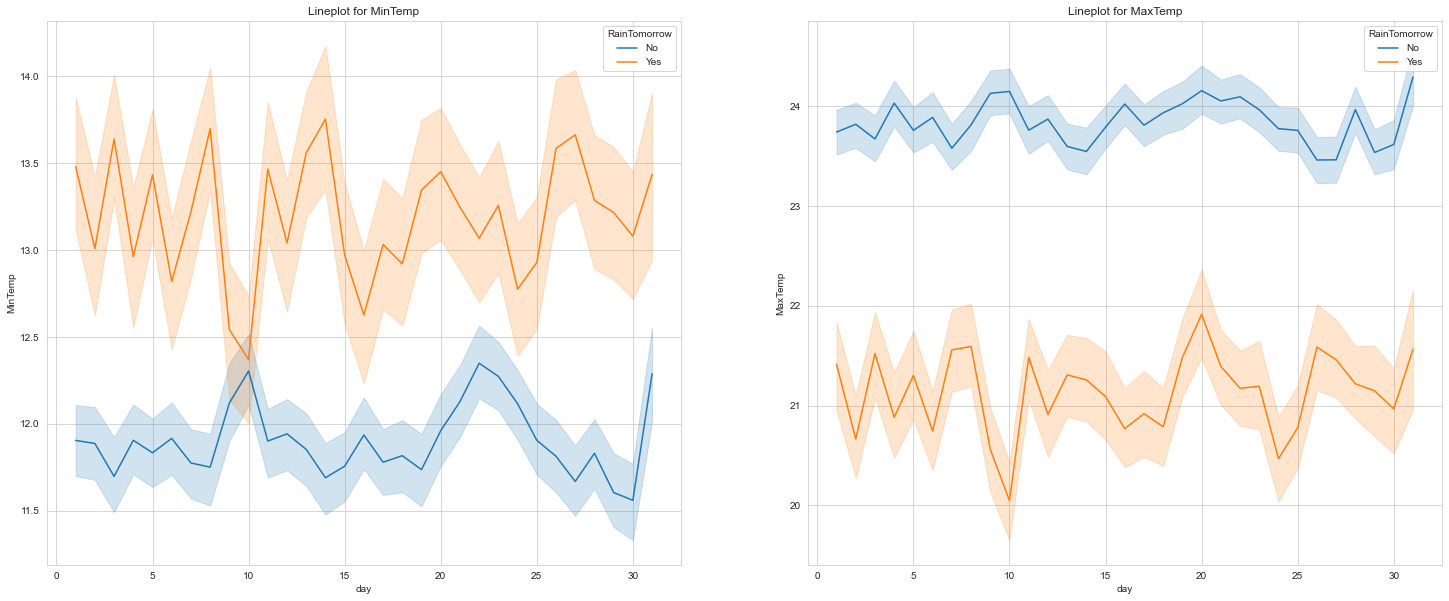

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Mintemp
sns.lineplot(ax=axes[0],x="day",y="MinTemp",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for MinTemp')
# Maxtemp
sns.lineplot(ax=axes[1],x="day",y="MaxTemp",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for MaxTemp')
plt.show()

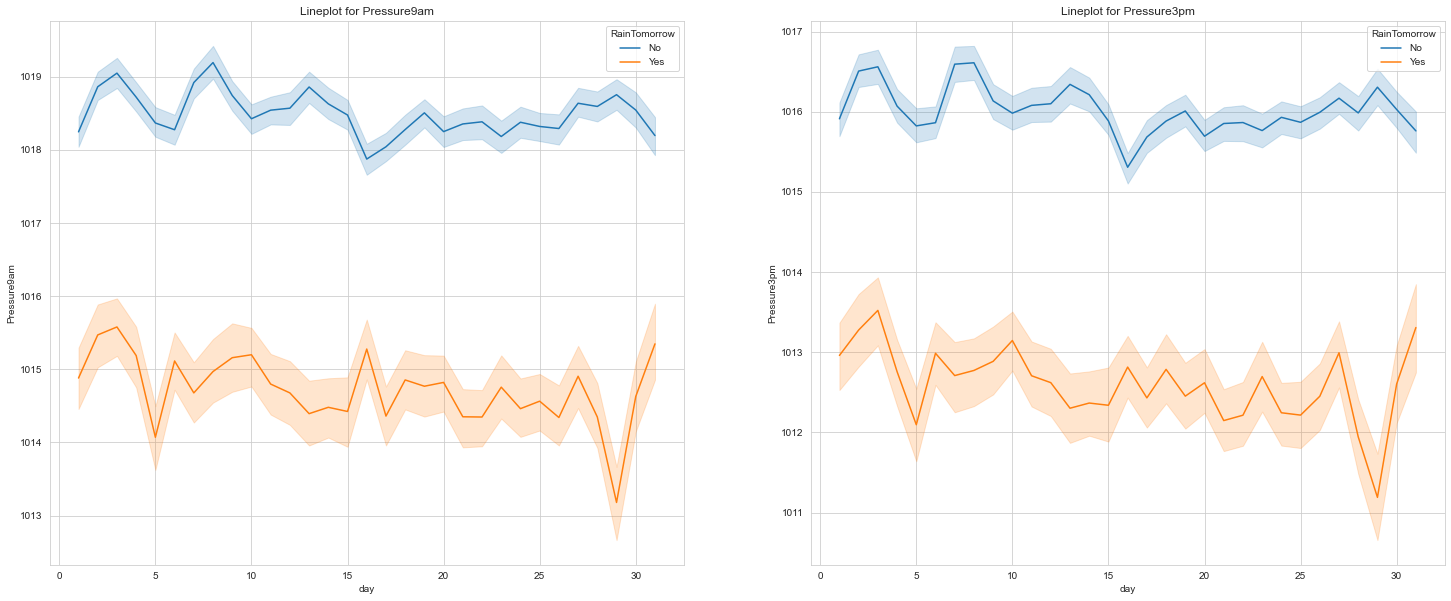

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Pressure9am
sns.lineplot(ax=axes[0],x="day",y="Pressure9am",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for Pressure9am')
# Pressure3pm
sns.lineplot(ax=axes[1],x="day",y="Pressure3pm",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for Pressure3pm')
plt.show()

### Treating The Outliers

In [35]:
def plot_boxplot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)
    
    # set fontdict
    font = {'family': 'serif',
        'color':  'green',
        'weight': 'normal',
        'size': 16,
        }
    
    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

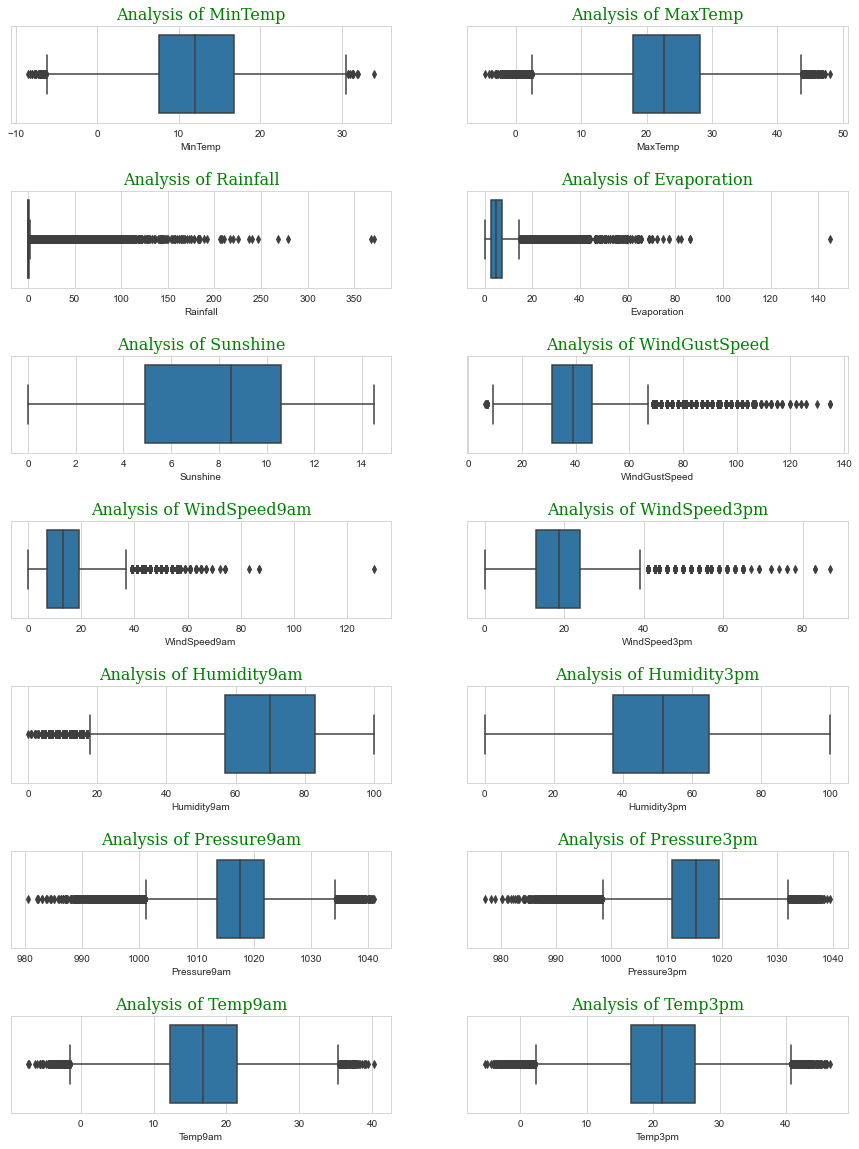

In [36]:
plot_boxplot(df, continuous_features)

In [37]:
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


### Removing Outliers using IQR Method

In [38]:
def remove_outliers(df,outliers_features):
    # create copy of dataframe
    
    data = df.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
#         data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [39]:
df = remove_outliers(df,outliers_features)

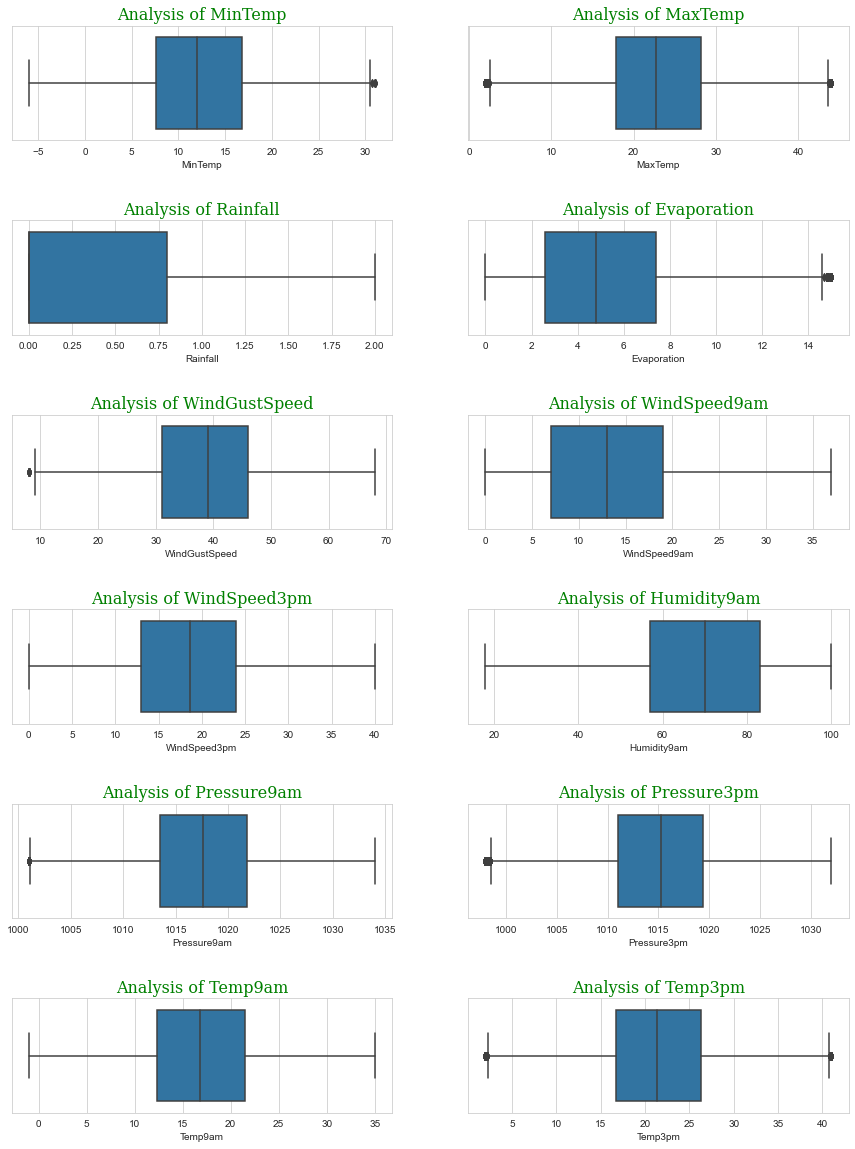

In [40]:
plot_boxplot(df, outliers_features)

Filling Na Values with No because of the highly imbalanced nature of DataSet

In [41]:
# Raintoday
df['RainToday'] = df['RainToday'].fillna('No')
# Raintomorrow
df['RainTomorrow'] = df['RainTomorrow'].fillna('No')

### Encoding the categorical variables

In [42]:
# For binary features, we'll use labelencoding
le = LabelEncoder()

label_encoder_features = binary_categorical_features

for col in label_encoder_features:
    df[col] = le.fit_transform(df[col])

In [43]:
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [44]:
def onehot_encoder(df, cols):
    data = df.copy()
    for col in cols:
        dummies = pd.get_dummies(data[col],drop_first=True,prefix=col)
        # concatenating dummies and original dataframe
        data = pd.concat([data, dummies], axis=1)
        
        # dropping original columns for which encoding is applied.
        data.drop(col, axis=1,inplace=True)
    return data

In [45]:
df = onehot_encoder(df,categorical_columns)

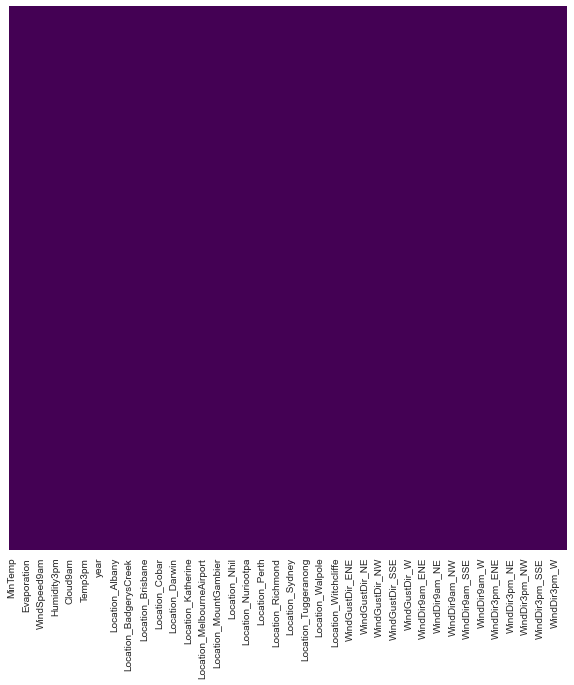

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.isnull(),cmap='viridis', ax=ax , yticklabels=False, cbar= False)
plt.show()

### Preparing the data for modeling

In [47]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [49]:
# Scaling Numerical Features - Imbalanced data

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Training and Evaluating The Cat Boost Model

In [50]:
cat_sm = CatBoostClassifier(iterations=2000, eval_metric = "AUC",verbose=0)
cat_sm.fit(X_train, y_train,verbose=0)

In [51]:
y_pred_cat = cat_sm.predict(X_test)
print(confusion_matrix(y_test,y_pred_cat))
print(accuracy_score(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))

[[21024  1094]
 [ 2769  3552]]
0.8641654066598685
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     22118
           1       0.76      0.56      0.65      6321

    accuracy                           0.86     28439
   macro avg       0.82      0.76      0.78     28439
weighted avg       0.86      0.86      0.86     28439



Text(0.5, 1.0, 'Feature Importance')

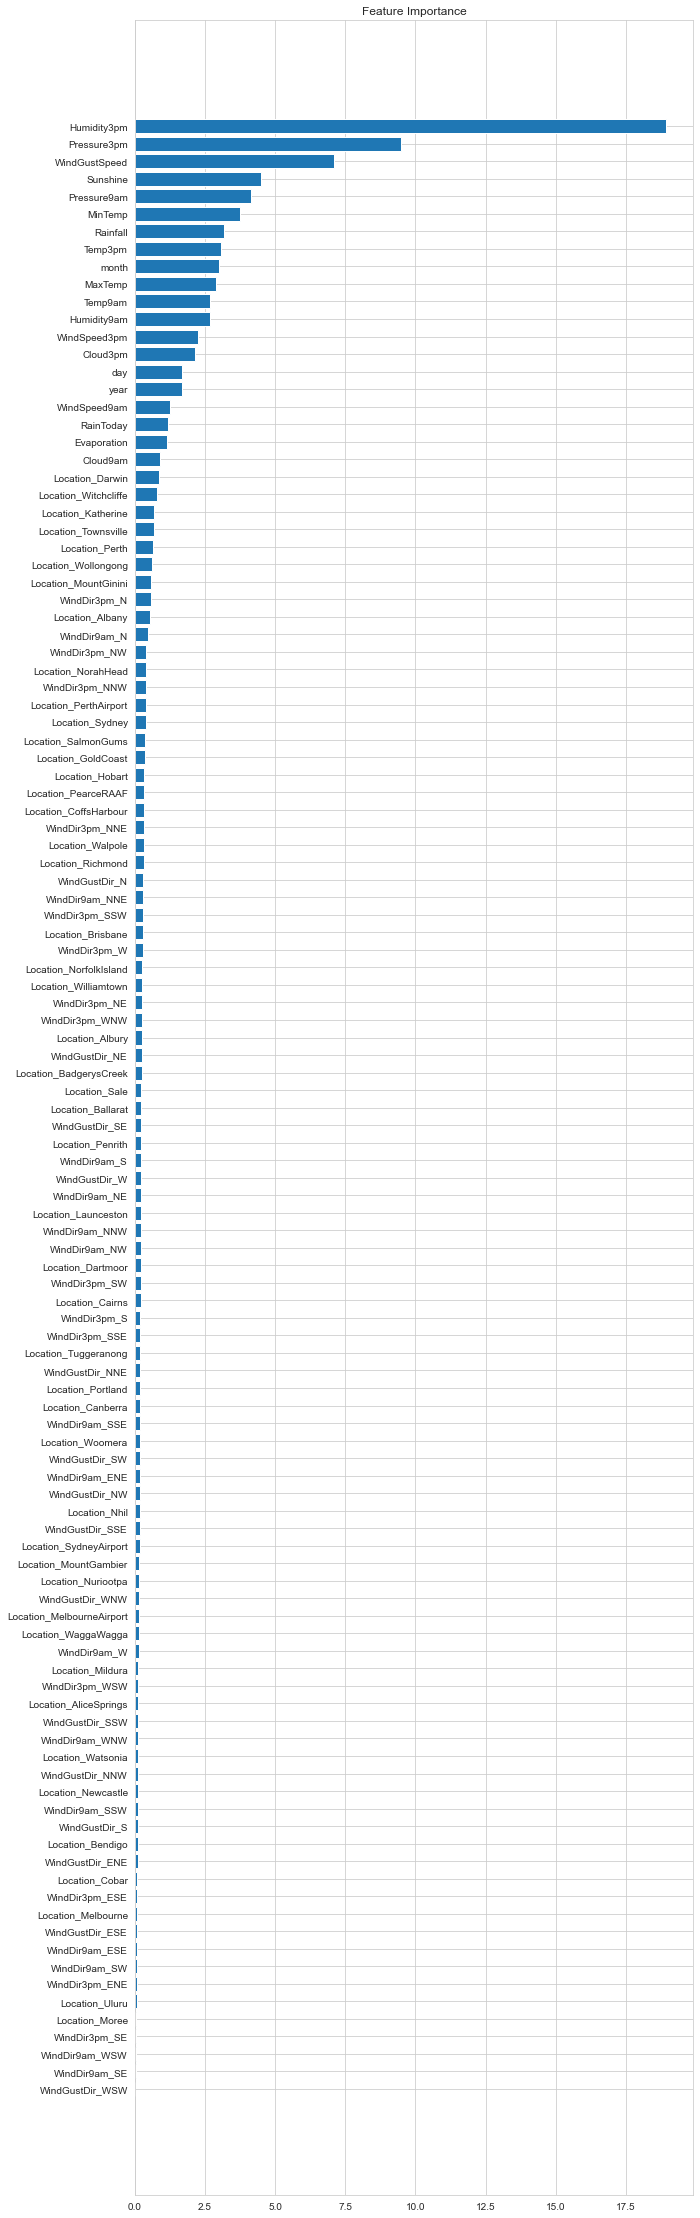

In [52]:
feature_importance = cat_sm.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 40))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


### Training and Evaluating The KNN Model

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred2 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[20078  2040]
 [ 3837  2484]]
0.7933471641056296
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     22118
           1       0.55      0.39      0.46      6321

    accuracy                           0.79     28439
   macro avg       0.69      0.65      0.67     28439
weighted avg       0.77      0.79      0.78     28439



### Training and Evaluating The Guassian Naive Bayes Model

In [55]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred4 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[13061  9057]
 [ 1749  4572]]
0.6200288336439397
              precision    recall  f1-score   support

           0       0.88      0.59      0.71     22118
           1       0.34      0.72      0.46      6321

    accuracy                           0.62     28439
   macro avg       0.61      0.66      0.58     28439
weighted avg       0.76      0.62      0.65     28439



### Training and Evaluating The Logistic Regression Model

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred5 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[20886  1232]
 [ 3086  3235]]
0.8481662505713984
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     22118
           1       0.72      0.51      0.60      6321

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439



### Training and Evaluating The Random Forest Classifier

In [59]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_pred6 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[21272   846]
 [ 3233  3088]]
0.856570202890397
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22118
           1       0.78      0.49      0.60      6321

    accuracy                           0.86     28439
   macro avg       0.83      0.73      0.76     28439
weighted avg       0.85      0.86      0.84     28439



### Training and Evaluating The Random Forest Classifier

In [61]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
y_pred7 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred7))
print(accuracy_score(y_test,y_pred7))
print(classification_report(y_test,y_pred7))

[[20924  1194]
 [ 2784  3537]]
0.8601216639122332
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22118
           1       0.75      0.56      0.64      6321

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.78     28439
weighted avg       0.85      0.86      0.85     28439



Clearly,the Catboost model is giving the best results and hence the cat boost model is going to be used in the webapp.

### Saving the Model

In [63]:
def save_model(model, directory_name, file_name):
    '''Check if directory exists, if not, create it'''
    CHECK_FOLDER = os.path.isdir(directory_name)

    # If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(directory_name)
        print("created folder : ", directory_name)
        filepath = os.path.join(directory_name, file_name)
        # save the model to disk
        pickle.dump(model, open(filepath, 'wb'))
        print("File Saved Successfully")

    else:
        print(directory_name, "folder already exists.")
        filepath = os.path.join(directory_name, file_name)
        # save the model to disk
        pickle.dump(model, open(filepath, 'wb'))
        print("File Saved Successfully")

# Apply function save_model to save the model
save_model(cat_sm,'Model','catboost_sm.pkl')

Model folder already exists.
File Saved Successfully
